# Imports and Functions

In [17]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from matplotlib.colors import ListedColormap, BoundaryNorm
import os
from pathlib import Path
from ImagePlotDigitizer_funcs import colormap_from_image_line, color_to_value, generate_x_axis_map, generate_y_axis_map, generate_arb_y_axis_map, generate_arb_x_axis_map, crop_image, make_axes_linear
%matplotlib widget

# Load Image into an rgb array

(480, 640, 3)

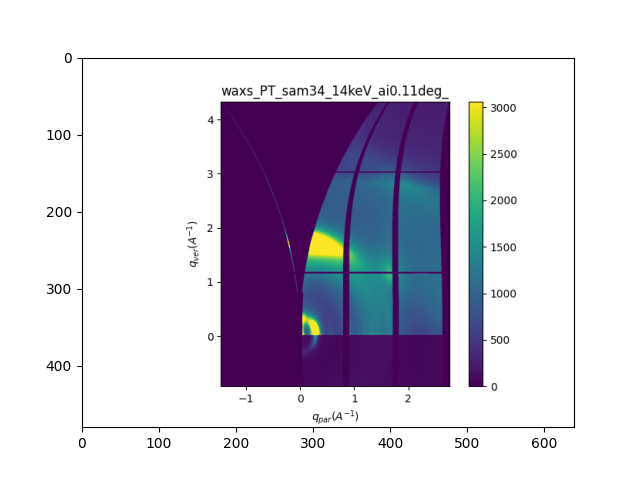

In [18]:
cwd = os.getcwd()
image_path = Path(cwd) / 'test_images/test_GIWAXS.png'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig,ax1 = subplots(1,1)
ax1.imshow(img_rgb)
np.shape(img_rgb)

# Define colormap from image (Preferred method)
ideally use a colorbar if provided

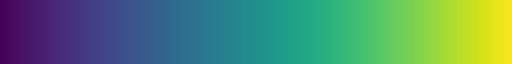

In [19]:
index =510 #center row or column of colorbar
start = 426 #start index (row or column)
stop = 60 #end index (row or column)

#make sure to specify orientation ('vertical' or 'horizontal') and flip if needed (standard orientation is left->right or bottom->up)
colormap = colormap_from_image_line(img_rgb, index, start, stop, width=5, normalize=True, orientation='vertical', flip=False, name='custom cmap')
colormap

## Optional: Define colormap from stock colormap (alternative method)
If you know what colormap was used to plot data this works well enough

In [20]:
# colormap = plt.colormaps['hot'].copy()
# # Extract the colors from the original colormap
# colors = colormap(np.linspace(0, 1, colormap.N))

# # If needed, modify the last colors to match overbound colors
# colors[-2] = (0.4,0,0.6,1)
# colors[-1] = (0.1,0,0.6,1)

# # Create a new colormap with the modified colors
# colormap = ListedColormap(colors)
# colormap

# Map RGB image array to colormap to convert it to value only array

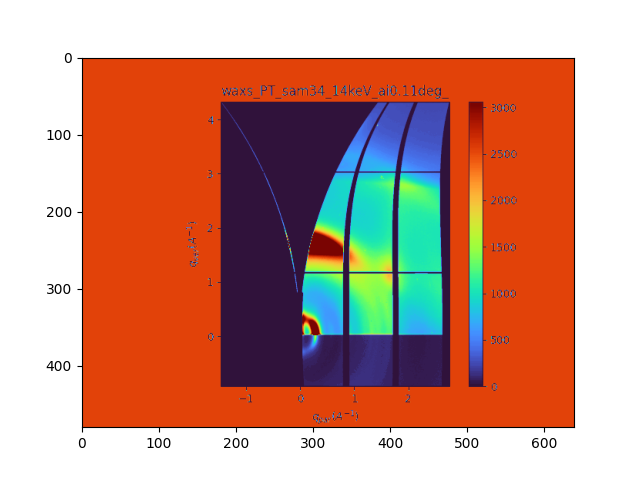

In [21]:
# Extract colors and map to data values
img_vals = color_to_value(img_rgb, colormap, min_val=0, max_val=0.018, num_samples=200, log=False)
fig,ax1 = subplots(1,1)
ax1.imshow(img_vals,
          cmap='turbo')

# Using interactive plot (above) fill in two x-axis values and corresponding column number

In [22]:
x1 = -1
col1 = 213
x2 = 2
col2 = 424
x_axis = generate_x_axis_map((col1, x1), (col2, x2), img_vals, log=False)

# # Example syntax for non-linear x axis:
# x_indices = [  32, 100, 168, 211, 239, 268, 297, 328, 359]
# x_coords =  [-0.5,   0, 0.5, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
# x_axis = generate_arb_x_axis_map(x_indices, x_coords, img_vals)

# Repeat for y-axis values and row number

In [23]:
y1 = 0
row1 = 362
y2 = 4
row2 = 81
y_axis = generate_y_axis_map((row1, y1), (row2, y2), img_vals, log=False)

# # Example syntax for non-linear y axis:
# y_indices = [ 16,  50,  83, 113, 143, 172, 201, 229, 257, 284, 311]
# y_coords =  [2.2, 2.0, 1.8, 1.6, 1.4, 1.2, 1.0, 0.8, 0.6, 0.4, 0.2]
# y_axis = generate_arb_y_axis_map(y_indices, y_coords, img_vals)

# Convert arbitrary (rectilinear) axis image to cartesian axis image
Use only if you have arbitrary axes

In [24]:
# img_vals, x_axis, y_axis = make_axes_linear(img_vals, x_axis, y_axis)

# Plot to verify axis values are correct

### If Linear (or linear converted) axes ###

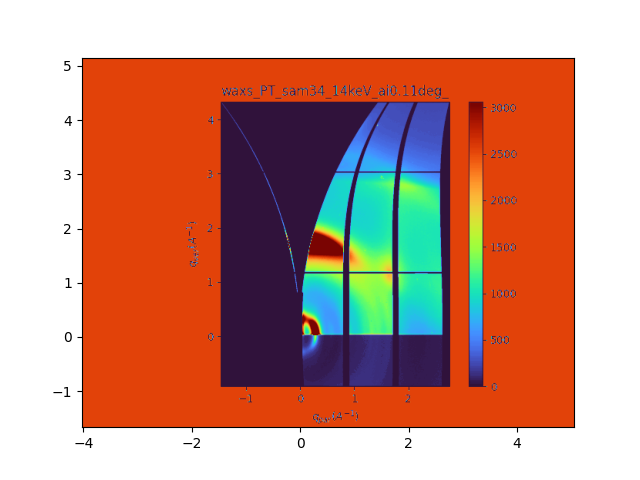

In [25]:
%matplotlib widget
fig,ax1 = subplots(1,1)
img_min = np.min(img_vals)
img_max = np.max(img_vals)
ax1.imshow(img_vals,
           norm=matplotlib.colors.Normalize(vmin=img_min, vmax=img_max),
           # norm=matplotlib.colors.LogNorm(vmin=np.percentile(img_array, 50), vmax=np.percentile(img_array, 99.9)),
           cmap='turbo',
           extent=(np.min(x_axis), np.max(x_axis), np.min(y_axis), np.max(y_axis)))

### Plot code for log scaled axes

In [26]:

### Only for log scaled axes plotting ###


# log_base = 4

# fig, ax1 = subplots()
# X, Y = np.meshgrid(x_axis, y_axis)
# img_min = np.min(img_vals)
# img_max = np.max(img_vals)
# #downsample if necessary
# ax1.pcolormesh(X[::2, ::2], Y[::2, ::2], img_vals[::2, ::2],
#                      norm=matplotlib.colors.Normalize(vmin=img_min, vmax=img_max),
#                      cmap='turbo',
#                      shading='auto')
# # ax1.pcolormesh(X, Y, img_vals,
# #                      norm=matplotlib.colors.Normalize(vmin=img_min, vmax=img_max),
# #                      cmap='turbo',
# #                      shading='auto')
# ax1.set_xscale('log', base=log_base)
# ax1.set_yscale('log', base=log_base)
# plt.show()

# Crop image

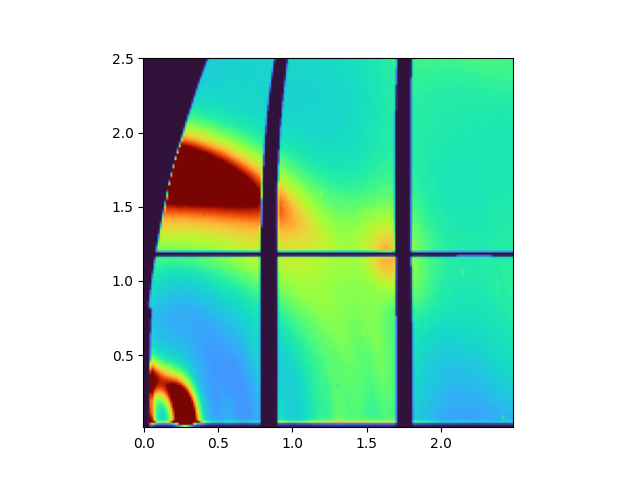

In [27]:
x_bounds = (0,2.5)
y_bounds = (0,2.5)
crop_img, crop_x_axis, crop_y_axis = crop_image(img_vals, x_bounds, y_bounds, x_axis, y_axis)

### Plot if linear scaled axes ####

fig,ax1 = subplots(1,1)
img_min = np.min(crop_img)
img_max = np.max(crop_img)
ax1.imshow(crop_img,
           norm=matplotlib.colors.Normalize(vmin=img_min, vmax=img_max),
           # norm=matplotlib.colors.LogNorm(vmin=np.percentile(img_array, 50), vmax=np.percentile(img_array, 99.9)),
           cmap='turbo',
           extent=(np.min(crop_x_axis), np.max(crop_x_axis), np.min(crop_y_axis), np.max(crop_y_axis)))



### Plot if log scaled axes ###

# log_base = 4

# fig, ax1 = subplots()
# X, Y = np.meshgrid(crop_x_axis, crop_y_axis)
# img_min = np.min(crop_img)
# img_max = np.max(crop_img)
# #downsample if necessary
# pcm = ax1.pcolormesh(X[::2, ::2], Y[::2, ::2], crop_img[::2, ::2],
#                      norm=matplotlib.colors.Normalize(vmin=img_min, vmax=img_max),
#                      cmap='turbo',
#                      shading='auto')
# # ax1.pcolormesh(X, Y, img_vals,
# #                      norm=matplotlib.colors.Normalize(vmin=img_min, vmax=img_max),
# #                      cmap='turbo',
# #                      shading='auto')
# ax1.set_xscale('log', base=log_base)
# ax1.set_yscale('log', base=log_base)
# fig.colorbar(pcm, ax=ax1)
# plt.show()

# Block out any labels (optional)

In [28]:
# top_left_corner = (0.9, 2.15)
# bottom_right_corner = (1.75, 1.95)
# fill_val = 20

# x1 = top_left_corner[0]
# x2 = bottom_right_corner[0]

# y1 = top_left_corner[1]
# y2 = bottom_right_corner[1]

# x_start_idx = np.argmin(np.abs(crop_x_axis-x1))
# x_end_idx = np.argmin(np.abs(crop_x_axis-x2))
# y_start_idx = np.argmin(np.abs(crop_y_axis-y1))
# y_end_idx = np.argmin(np.abs(crop_y_axis-y2))

# crop_img[y_start_idx:y_end_idx, x_start_idx:x_end_idx] = fill_val

# fig,ax1 = subplots(1,1)
# img_min = np.min(crop_img)
# img_max = np.max(crop_img)
# ax1.imshow(crop_img,
#            norm=matplotlib.colors.Normalize(vmin=img_min, vmax=img_max),
#            # norm=matplotlib.colors.LogNorm(vmin=np.percentile(img_array, 50), vmax=np.percentile(img_array, 99.9)),
#            cmap='turbo',
#            extent=(np.min(crop_x_axis), np.max(crop_x_axis), np.min(crop_y_axis), np.max(crop_y_axis)))

# Save Image and axes

In [29]:
save_dirr = f'{cwd}/outputs'
if not os.path.exists(save_dirr):
    os.mkdir(save_dirr)
img_name = 'GIWAXS_digitized'
np.save(f'{save_dirr}/{img_name}_img.npy', crop_img)
np.save(f'{save_dirr}/{img_name}_xaxis.npy', crop_x_axis)
np.save(f'{save_dirr}/{img_name}_yaxis.npy', crop_y_axis)
plt.close('all')